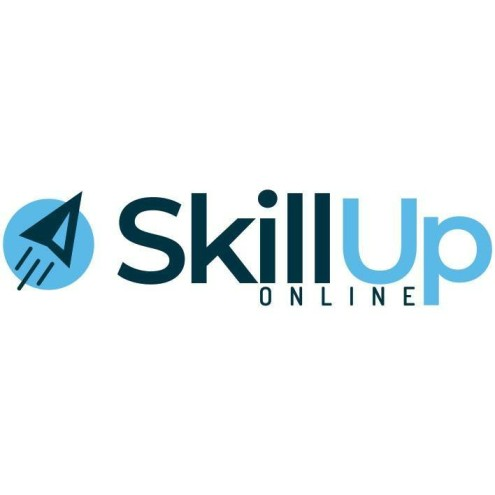

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Notas previas de Mi Proyecto (Importante leer primero)


Para elaborar este proyecto, he seguido las instrucciones del Notebook y tambíen las sesiones informativas de Hugo y las 3 AMAs.

En la fase de importación de datos y verificación he querido usar (Describe y Info) para profundizar en la naturaleza del dataset y tener más información. 

Se ha decidido y confirmado en AMA con Hugo que en este caso al ser proyecto pequeño, valía la pena usar variables distintas para almacenar las distintas fases del dataset. Finalizando con (data_limpia) para el dataset limpiado.

En la parte final del proyecto, antes de ntrenar el módelo, he estandarizado los datos con (scaler) tal y como pedía Hugo, además en varias pruebas que he hecho sin estandarizar para RandomForest y SVM, la conclusión es que la estandarización de los datos, no afecta para nada en los resultados obtenidos con el método Randomforest, mientras que  usando el modelo de vectores SVM sin estandarizar he detectado que daba resultados erroneos, y que por lo tanto el modelo SVM sin estandarizar no era válido. Por este motivo no muestro pruebas sin estandarizar.

Finalmente he usado dos metodos distintos de entrenamiento del modelo para averiguar cual daba mejor resultado, siendo el método RandomForest el que obtenia mejores valoraciones y resultados a la hora de predecir las operaciones fraudulentas.

Conclusión: Por último al final de todo el proceso, aprovechando el curso que nos han dado de Chat-GPT, he usado los conocimientos adquiridos para que Chat-GPT analice los resultados obtenidos, os pongo sus conclusiones al final.



### Importa las bibliotecas necesarias

In [68]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importa y organiza el dataset

In [71]:
# Organizar los datos en un dataframe

data = pd.read_csv("creditcard.csv")

data.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [73]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

In [14]:
#Escribe tu código aquí
valores_nulos = data.isnull().sum()
print (valores_nulos)
data_sin_nulos = data.dropna()
data_sin_nulos


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [17]:
#Escribe tu código aquí
filas_duplicadas = data_sin_nulos.duplicated().sum()
print (filas_duplicadas)

1081


In [18]:
# El dataset definitivo limpio con que trabajare lo almacenare en la variable "data_limpia"
data_limpia = data_sin_nulos.drop_duplicates()
data_limpia.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [22]:
# Calcula el porcentaje de transacciones fraudulentas

# Número total de transacciones y transacciones fraudulentas
transacciones_fraud = data_limpia['Class'].sum()
transacciones_tot = len(data_limpia)

# Porcentaje de transacciones fraudulentas : lo calculo y almaceno en la variable "porcentaje_fraud"
porcentaje_fraud = (transacciones_fraud / transacciones_tot) * 100

# Muestra el porcentaje de transacciones fraudulentas almacenado en la variable uilizando el método formateo de cadenas en Python

print(f"El porcentaje de transacciones fraudulentas es: {porcentaje_fraud:.4f}%")


El porcentaje de transacciones fraudulentas es: 0.1667%


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [25]:
# Calcula el importe medio de las transacciones fraudulentas

# Transacciones fraudulentas
transacciones_fraud = data_limpia[data_limpia['Class'] == 1]

# Cálculo media
media_transacciones_fraud = transacciones_fraud['Amount'].mean()

# Muestra el importe medio de las transacciones fraudulentas uilizando el método formateo de cadenas en Python

print(f"El importe medio de las transacciones fraudulentas es: {media_transacciones_fraud:.2f}")

El importe medio de las transacciones fraudulentas es: 123.87


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

Class
0    283253
1       473
Name: count, dtype: int64


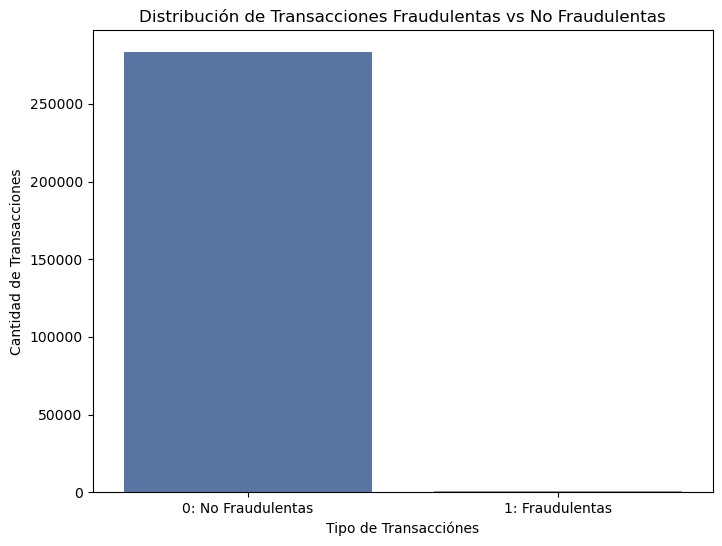

In [29]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
conteo_fraud = data_limpia['Class'].value_counts()
print (conteo_fraud)

# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_fraud.index, y=conteo_fraud.values, palette='deep')

# Pongo etiquetas y título al gráfico
plt.title('Distribución de Transacciones Fraudulentas vs No Fraudulentas')
plt.xlabel('Tipo de Transacciónes')
plt.ylabel('Cantidad de Transacciones')
plt.xticks([0, 1], ['0: No Fraudulentas', '1: Fraudulentas'])

# Gráfico
plt.show()


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


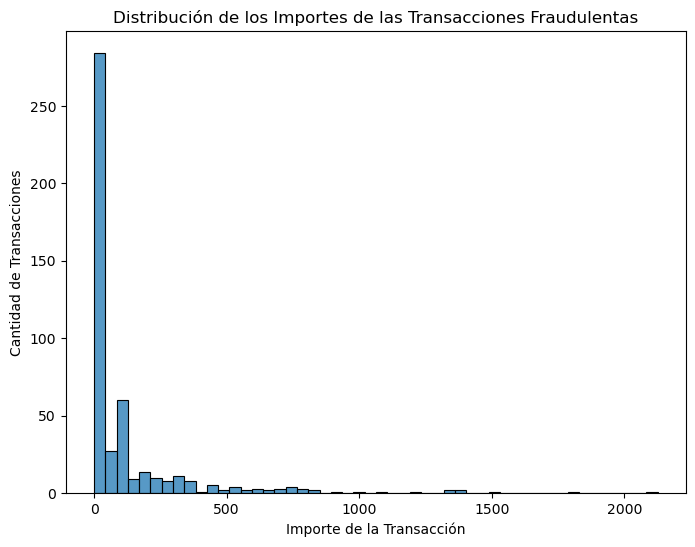

In [32]:
# Separa los datos de transacciones fraudulentas
transacciones_fraud = data_limpia[data_limpia['Class'] == 1]

# Muestra la distribución de los importes de las transacciones fraudulentas
plt.figure(figsize=(8, 6))
sns.histplot(transacciones_fraud['Amount'], bins=50, palette="deep")

# # Pongo etiquetas y título al gráfico
plt.title('Distribución de los Importes de las Transacciones Fraudulentas')
plt.xlabel('Importe de la Transacción')
plt.ylabel('Cantidad de Transacciones')

# Mostrar el gráfico
plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [36]:
# Separa los datos de entrenamiento y evaluación
# Siguiendo instrucciones de Hugo Ramallo importo de la librería SKLEARN train test split, 
# también estandarizo los datos para que funcione mejor el modelo

from sklearn.model_selection import train_test_split

# La variable objetivo Y es class, la separ del resto de variables mediante Drop y dejo en X el resto de variables

X = data_limpia.drop('Class', axis=1)
y = data_limpia['Class']

# Aqui separo los datos, uso el argumento random_state valor 42 ya que es el número comunmente utilizado, según he podidido averiguar

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimo el tamaño de los datos para comprobación según se aconseja por Hugo
print("Tamaño del conjunto de entrenamiento (X_train):", X_train.shape)
print("Tamaño del conjunto de evaluación (X_test):", X_test.shape)
print("Tamaño del conjunto de entrenamiento (y_train):", y_train.shape)
print("Tamaño del conjunto de evaluación (y_test):", y_test.shape)

# En la Tutoria sesión 5 Hugo comenta que estandaricemos los datos para tener mejores resultados y que el modelo funcione más eficazmente

from sklearn.preprocessing import StandardScaler

# Uso scaler para ello y  estandarizo los datos de entrenamiento y test (excepto los valores objetivo y, ya que ya son 0 y 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Tamaño del conjunto de entrenamiento (X_train): (226980, 30)
Tamaño del conjunto de evaluación (X_test): (56746, 30)
Tamaño del conjunto de entrenamiento (y_train): (226980,)
Tamaño del conjunto de evaluación (y_test): (56746,)


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

In [39]:
# Escribe tu código aquí

# Siguiendo la pista y tutoria de Hugo usaré en primer lugar el método RandomForest para entrenar el módelo y predict para las predicciones
# Bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Defino modelo RandomForestClassifier con los hiperparámetros indicados y lo entreno con los datos train mediante  .fit()

modelo = RandomForestClassifier(max_depth=150, random_state=42)

modelo.fit(X_train, y_train)

# Almaceno las predicciones sobre los datos de evaluación en y_pred
y_pred = modelo.predict(X_test)

# Reporte de clasificación
print("Resumen de rendimiento:")
print(classification_report(y_test, y_pred))

# Exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print(f"La exactitud del modelo es: {exactitud * 100:.2f}%")

Resumen de rendimiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

La exactitud del modelo es: 99.95%


In [40]:
# Pruebo el uso del modelo SVM para poder comparar que modelo funciona mejor, repetimos entreno y evaluación
# Importo bibliotecas necesarias
from sklearn.svm import SVC

# Inicializar el clasificador SVM
model_SVM = SVC(kernel='rbf', C=1, gamma='scale', probability=True)

# Entrenar el modelo
model_SVM.fit(X_train, y_train)

# Almaceno las predicciones sobre los datos de evaluación en SVM_pred
SVM_pred = model_SVM.predict(X_test)

# Reporte de clasificación
print("Resumen de rendimiento modelo SVM Máquina de Vectores de Soporte:")
print(classification_report(y_test, SVM_pred))

# Exactitud del modelo
exactitud_SVM = accuracy_score(y_test, SVM_pred)
print(f"La exactitud del modelo es: {exactitud_SVM * 100:.2f}%")



Resumen de rendimiento modelo SVM Máquina de Vectores de Soporte:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.98      0.64      0.78        90

    accuracy                           1.00     56746
   macro avg       0.99      0.82      0.89     56746
weighted avg       1.00      1.00      1.00     56746

La exactitud del modelo es: 99.94%


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>

In [42]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

print(confusion_matrix(y_test, SVM_pred))

[[56654     2]
 [   24    66]]
[[56655     1]
 [   32    58]]


# Comentarios finales extraidos de el analisis realizado por Chat-GPT:

### Análisis de los Resultados

Has aplicado y evaluado dos modelos de Machine Learning: **RandomForest** y **SVM** (Máquina de Vectores de Soporte) sobre un dataset de detección de fraudes con tarjetas de crédito, utilizando datos estandarizados. Vamos a analizar los resultados obtenidos por ambos modelos y extraer conclusiones.

### 1. **Resultados del Modelo RandomForest**

- **Resumen de rendimiento:**
  - **Precision (clase 1):** 0.97
  - **Recall (clase 1):** 0.73
  - **F1-score (clase 1):** 0.84
  - **Exactitud del modelo:** 99.95%

- **Matriz de confusión:**
  - [[56654, 2], [24, 66]]

**Interpretación:**
- **Precisión:** El modelo identifica correctamente el 97% de las transacciones que predice como fraudulentas.
- **Recall:** El modelo detecta el 73% de las transacciones realmente fraudulentas. Es decir, de las 90 transacciones fraudulentas, el modelo detecta 66 correctamente, y falla en 24.
- **F1-Score:** El F1-Score de 0.84 para la clase 1 (fraudulenta) indica un buen balance entre precisión y recall, lo que es importante en contextos donde el coste de falsos negativos (transacciones fraudulentas no detectadas) es alto.
- **Matriz de confusión:** El modelo solo falla en 26 casos (2 falsos positivos y 24 falsos negativos), lo que indica un excelente rendimiento general.

### 2. **Resultados del Modelo SVM**

- **Resumen de rendimiento:**
  - **Precision (clase 1):** 0.98
  - **Recall (clase 1):** 0.64
  - **F1-score (clase 1):** 0.78
  - **Exactitud del modelo:** 99.94%

- **Matriz de confusión:**
  - [[56655, 1], [32, 58]]

**Interpretación:**
- **Precisión:** El modelo SVM es ligeramente más preciso que RandomForest, con un 98% de precisión en la detección de transacciones fraudulentas.
- **Recall:** Sin embargo, su capacidad para detectar transacciones fraudulentas es menor, con un 64% (el modelo no detecta 32 de las 90 transacciones fraudulentas).
- **F1-Score:** El F1-Score de 0.78 es menor que el de RandomForest, lo que sugiere un menor equilibrio entre precisión y recall.
- **Matriz de confusión:** El modelo comete más errores que RandomForest, con 33 errores (1 falso positivo y 32 falsos negativos).

### 3. **Comparación entre RandomForest y SVM**

- **Precisión:** Ambos modelos son altamente precisos, pero SVM tiene una precisión ligeramente superior en la detección de transacciones fraudulentas.
- **Recall:** RandomForest tiene un mejor recall, lo que significa que detecta una mayor proporción de transacciones fraudulentas. Esto es crucial en el contexto de detección de fraudes, donde los falsos negativos (fraudes no detectados) tienen un alto coste.
- **F1-Score:** RandomForest tiene un F1-Score superior, lo que indica un mejor equilibrio general entre precisión y recall.
- **Matriz de confusión:** RandomForest comete menos errores globales en comparación con SVM, lo que lo hace más confiable en la detección de fraudes.

### Conclusiones Finales

1. **Modelo Recomendado: RandomForest**:
   - **Mejor equilibrio**: El modelo RandomForest presenta un mejor equilibrio entre precisión y recall, lo que lo hace más adecuado para la detección de fraudes, donde es crítico identificar la mayor cantidad posible de transacciones fraudulentas.
   - **Menos errores**: RandomForest comete menos errores en términos de falsos negativos, lo cual es preferible en la mayoría de los contextos de seguridad.

2. **Uso de SVM como apoyo**:
   - **Precisión superior**: Aunque SVM tiene una precisión ligeramente superior, su menor recall y mayor número de errores falsos negativos lo hacen menos confiable como modelo principal.
   - **Posible complemento**: SVM podría ser útil como un modelo complementario si se utilizan técnicas de ensamblado o si se busca un segundo punto de referencia en el sistema de detección.

3. **Estandarización de datos**:
   - **Necesidad para SVM**: Como observaste, la estandarización es crítica para el rendimiento del modelo SVM. Sin estandarización, este modelo falla drásticamente.
   - **RandomForest es robusto**: Este modelo muestra un rendimiento consistente independientemente de la estandarización, lo que lo hace versátil y fácil de aplicar.

### Recomendación Final

Para la implementación práctica, te recomendaría usar **RandomForest como el modelo principal** debido a su mayor fiabilidad y menor tasa de errores. Si decides utilizar SVM, asegúrate de que los datos estén correctamente estandarizados y considera su uso como un modelo complementario para mejorar la precisión del sistema general de detección de fraudes.